In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.linear_model import Ridge


In [2]:
Laptop_price = pd.read_csv('Laptop_price.csv')

In [3]:
Laptop_price.head

<bound method NDFrame.head of       Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16               512    11.185147   
1      Acer         2.912833         4              1000    11.311372   
2    Lenovo         3.241627         4               256    11.853023   
3      Acer         3.806248        16               512    12.280360   
4      Acer         3.268097        32              1000    14.990877   
..      ...              ...       ...               ...          ...   
995      HP         3.343584         4              1000    12.587095   
996    Dell         2.780555         8               256    12.679356   
997    Dell         3.200569         4               512    12.666315   
998    Asus         1.604182         8               256    11.215581   
999  Lenovo         1.711980         4               256    16.561498   

       Weight         Price  
0    2.641094  17395.093065  
1    3.260012  31607.605919  
2  

In [4]:
Laptop_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [5]:
print(Laptop_price['Brand'].value_counts())

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64


In [6]:
Laptop_price['Brand'] = Laptop_price['Brand'].map({'Dell':0,'Asus':1,'Acer':2,'Lenovo':3,'HP':4})

In [7]:
Laptop_price.head

<bound method NDFrame.head of      Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0        1         3.830296        16               512    11.185147   
1        2         2.912833         4              1000    11.311372   
2        3         3.241627         4               256    11.853023   
3        2         3.806248        16               512    12.280360   
4        2         3.268097        32              1000    14.990877   
..     ...              ...       ...               ...          ...   
995      4         3.343584         4              1000    12.587095   
996      0         2.780555         8               256    12.679356   
997      0         3.200569         4               512    12.666315   
998      1         1.604182         8               256    11.215581   
999      3         1.711980         4               256    16.561498   

       Weight         Price  
0    2.641094  17395.093065  
1    3.260012  31607.605919  
2    2.029061  

In [8]:
Laptop_price.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [9]:
Laptop_price.describe()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.944000,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,1.412395,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,0.000000,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,1.000000,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.000000,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.000000,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,4.000000,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [10]:
X = Laptop_price.drop(['Price'],axis=1)
Y = Laptop_price['Price']

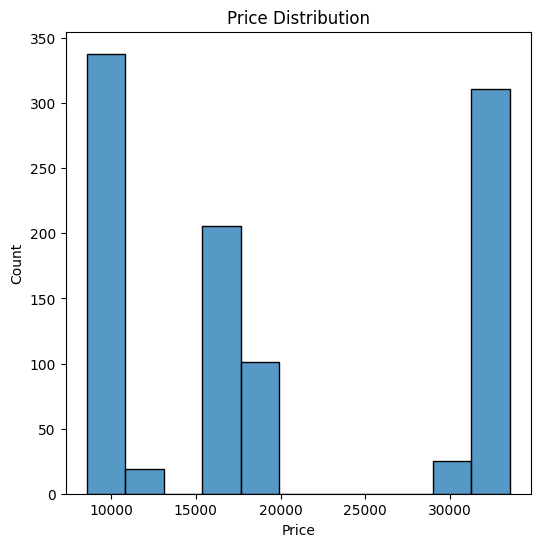

In [11]:

plt.figure(figsize=(6,6))
sns.histplot(Laptop_price['Price'])
plt.title('Price Distribution')
plt.show()

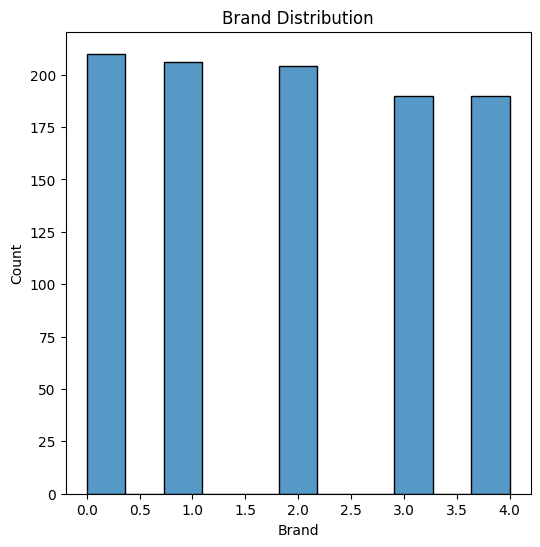

In [12]:
plt.figure(figsize=(6,6))
sns.histplot(Laptop_price['Brand'])
plt.title('Brand Distribution')
plt.show()

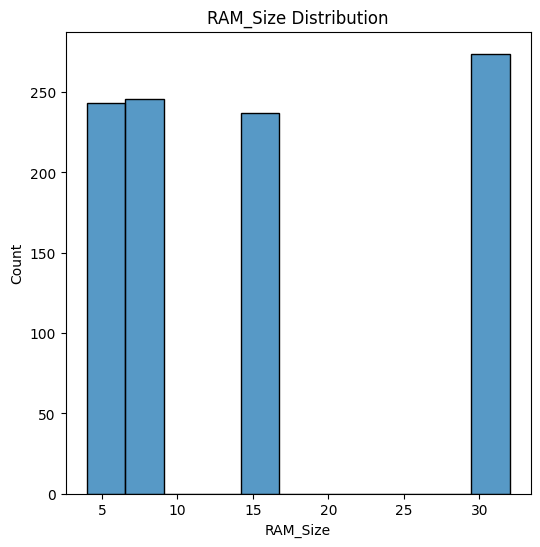

In [13]:
plt.figure(figsize=(6,6))
sns.histplot(Laptop_price['RAM_Size'])
plt.title('RAM_Size Distribution')
plt.show()

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)

In [37]:
from sklearn.metrics import mean_squared_error

def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict = model.predict(X_train)
    ytest_predict = model.predict(X_test)
    
    train_error = metrics.r2_score(Y_train, ytrain_predict)
    test_error = metrics.r2_score(Y_test, ytest_predict)
    
    print("Training error (r2):", train_error)
    print("Testing error (r2):", test_error)

    # Scatter plot for training and testing predictions
    plt.scatter(Y_train, ytrain_predict, marker='o', label='Train Predictions')
    plt.scatter(Y_test, ytest_predict, marker='^', label='Test Predictions')

    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()

    print("Coefficients:")
    print(coefs)

In [33]:
lin_reg_model = LinearRegression()

In [34]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Training error (r2): 0.9995494848860592
Testing error (r2): 0.9996903049519084


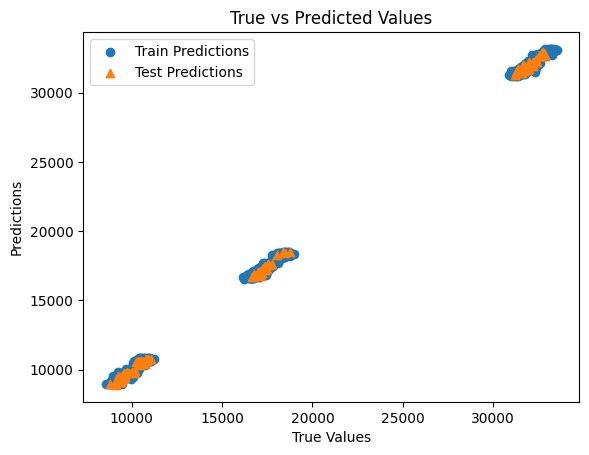

Coefficients:
[481.8304472163145, 0.4602752617210603, 199.9286075032052, 50.647238945079664, 29.987029114029298, 19.60648714685807, -6.295108432824363]


In [38]:
display_results(lin_reg_model)

In [19]:
lass_reg_model = Lasso()

In [20]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Training error (r2): 0.9995494402888855
Testing error (r2): 0.9996912539123671


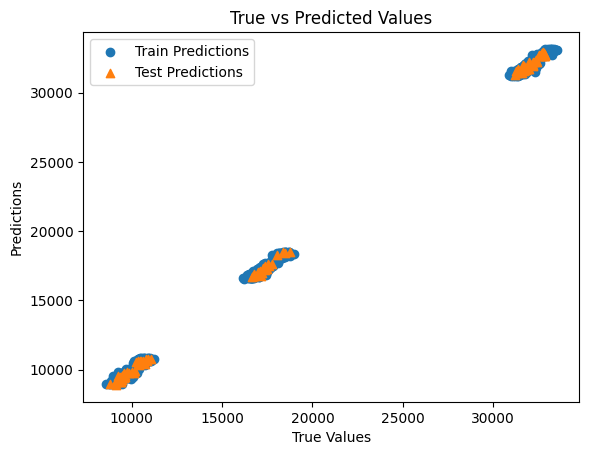

Coefficients:
[489.1841312855613, 0.0, 198.12198850694054, 50.64284832109878, 29.986591545026734, 19.213832404327853, -5.039043995887236]


In [39]:
display_results(lass_reg_model)

In [22]:
rid_reg_model = Ridge()


In [23]:
rid_reg_model.fit(X_train,Y_train)

Ridge()

Training error (r2): 0.9995494838237206
Testing error (r2): 0.9996903374860074


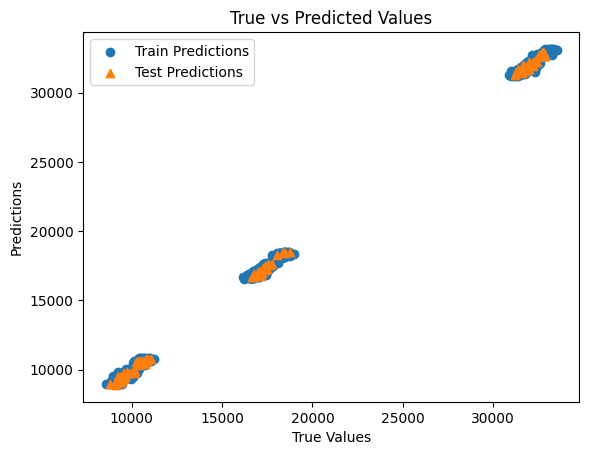

Coefficients:
[483.2085056072974, 0.46553273145856616, 199.510988904256, 50.647722066346894, 29.98696952950664, 19.593389451150195, -6.302097596923025]


In [40]:
display_results(rid_reg_model)